<a href="https://colab.research.google.com/github/duonghung86/Injury-severity-classification/blob/main/VCA_2_01_Simpleclassifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time

# Import dataset

In [3]:
df = pd.read_csv('Prepared Texas 2019.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949856 entries, 0 to 949855
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Prsn_Injry_Sev     949856 non-null  int64 
 1   Prsn_Age           949856 non-null  int64 
 2   Prsn_Gndr          949856 non-null  object
 3   Wthr_Cond          949856 non-null  object
 4   Light_Cond         949856 non-null  object
 5   Surf_Cond          949856 non-null  object
 6   Veh_Body_Styl      949856 non-null  object
 7   Prsn_Rest          949856 non-null  object
 8   Prsn_Drg_Rslt      949856 non-null  object
 9   Harm_Evnt          949856 non-null  object
 10  Rural              949856 non-null  int64 
 11  Crash_Speed_Limit  949856 non-null  int64 
 12  Road_Algn          949856 non-null  object
 13  Veh_Mod_Year       949856 non-null  int64 
 14  Weekend            949856 non-null  int64 
 15  Crash_season       949856 non-null  int64 
 16  Part_of_day        9

,Prsn_Injry_Sev,Prsn_Age,Prsn_Gndr,Wthr_Cond,Light_Cond,Surf_Cond,Veh_Body_Styl,Prsn_Rest,Prsn_Drg_Rslt,Harm_Evnt,Rural,Crash_Speed_Limit,Road_Algn,Veh_Mod_Year,Weekend,Crash_season,Part_of_day,Collsn_type,Collsn_name
0,0,26,MALE,CLEAR,DAYLIGHT,DRY,"PASSENGER CAR, 2-DOOR",SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",33,1,3,3,SAME DIRECTION,ONE STRAIGHT-ONE LEFT TURN
1,0,52,MALE,CLEAR,DAYLIGHT,DRY,"PASSENGER CAR, 2-DOOR",SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",19,1,3,3,SAME DIRECTION,ONE STRAIGHT-ONE LEFT TURN
2,0,27,FEMALE,CLEAR,DAYLIGHT,DRY,PICKUP,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,1,-1,"CURVE, LEVEL",16,1,3,4,SAME DIRECTION,BOTH LEFT TURN
3,0,44,MALE,CLEAR,DAYLIGHT,DRY,PICKUP,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,1,-1,"CURVE, LEVEL",4,1,3,4,SAME DIRECTION,BOTH LEFT TURN
4,0,50,FEMALE,CLEAR,DAYLIGHT,DRY,SPORT UTILITY VEHICLE,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",16,1,3,4,ANGLE,BOTH GOING STRAIGHT


In [5]:
y=df['Prsn_Injry_Sev']
y.value_counts()

0    792558
1    102409
2     45242
3      7951
4      1696
Name: Prsn_Injry_Sev, dtype: int64

In [6]:
y.value_counts()/len(y)

0    0.834398
1    0.107815
2    0.047630
3    0.008371
4    0.001786
Name: Prsn_Injry_Sev, dtype: float64

In [8]:
X = df.drop(columns=['Prsn_Injry_Sev'])
X.shape

(949856, 18)

In [9]:
feats = X.columns

In [22]:
cate_vars = df.dtypes[df.dtypes=='O'].index.values
cate_vars

array(['Prsn_Gndr', 'Wthr_Cond', 'Light_Cond', 'Surf_Cond',
       'Veh_Body_Styl', 'Prsn_Rest', 'Prsn_Drg_Rslt', 'Harm_Evnt',
       'Road_Algn', 'Collsn_type', 'Collsn_name'], dtype=object)

In [23]:
for var in cate_vars:
    print(var)
    X[var] = X[var].astype('category').cat.codes
X.head()

Prsn_Gndr
Wthr_Cond
Light_Cond
Surf_Cond
Veh_Body_Styl
Prsn_Rest
Prsn_Drg_Rslt
Harm_Evnt
Road_Algn
Collsn_type
Collsn_name


,Prsn_Age,Prsn_Gndr,Wthr_Cond,Light_Cond,Surf_Cond,Veh_Body_Styl,Prsn_Rest,Prsn_Drg_Rslt,Harm_Evnt,Rural,Crash_Speed_Limit,Road_Algn,Veh_Mod_Year,Weekend,Crash_season,Part_of_day,Collsn_type,Collsn_name
0,26,1,1,4,0,6,8,1,2,0,-1,6,33,1,3,3,4,19
1,52,1,1,4,0,6,8,1,2,0,-1,6,19,1,3,3,4,19
2,27,0,1,4,0,8,8,1,2,1,-1,2,16,1,3,4,4,6
3,44,1,1,4,0,8,8,1,2,1,-1,2,4,1,3,4,4,6
4,50,0,1,4,0,10,8,1,2,0,-1,6,16,1,3,4,0,3


# Split the dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=48)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train, random_state=48)

X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training features shape: (607907, 18)
Validation features shape: (151977, 18)
Test features shape: (189972, 18)


In [26]:
# standardization
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Mini function

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import auc

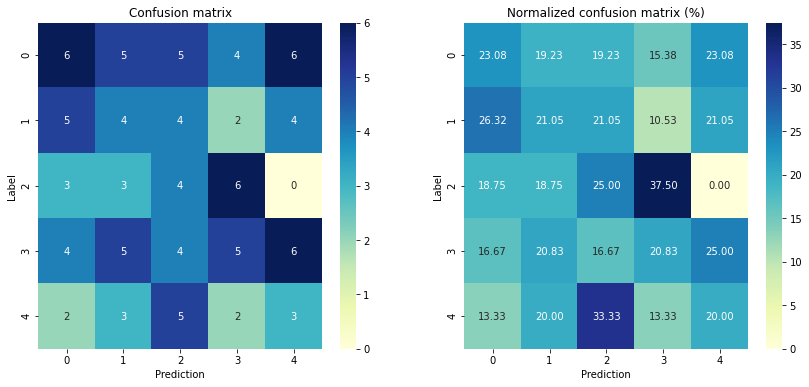

[0.22,
 0.23076923076923078,
 0.21052631578947367,
 0.25,
 0.20833333333333334,
 0.2,
 0.21920104081815073]

In [29]:
def get_accs(label,prediction, show=True):
    cm = confusion_matrix(label,prediction)
    length = cm.shape[0]
    num_cases = len(label)
    # global accuracy
    glb_acc = np.trace(cm)/len(label)
    ind_accs = cm/np.sum(cm,axis=1)[:, np.newaxis]
    accs = [ind_accs[i,i] for i in range(length)]
    accs.insert(0,glb_acc)
    # G-mean
    accs.append(geometric_mean_score(label, prediction,correction=0.001))

    if show:
        plt.figure(figsize=(14, 6))
        plt.subplot(1,2,1)
        sns.heatmap(cm, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='g',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Confusion matrix')
        plt.subplot(1,2,2)
        sns.heatmap(ind_accs*100, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='.2f',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Normalized confusion matrix (%)')
        plt.show()
    return accs
get_accs(np.random.randint(5, size=100),np.random.randint(5, size=100))

# Applying traditional machine learning algorithms


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

LR


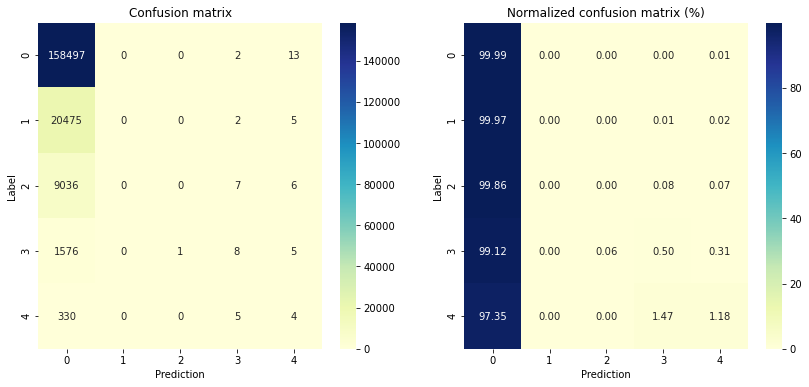

DT


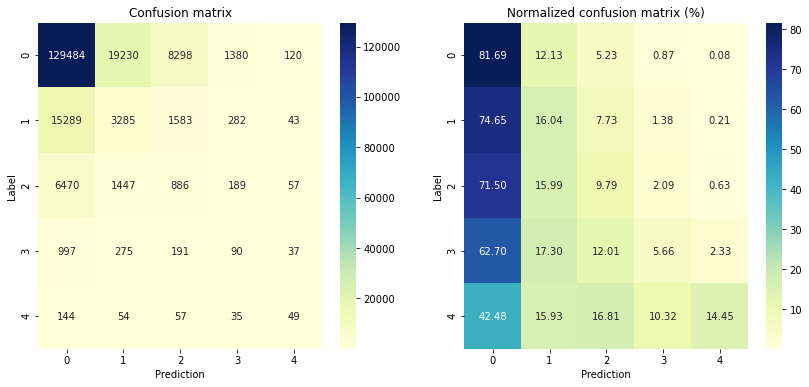

RF


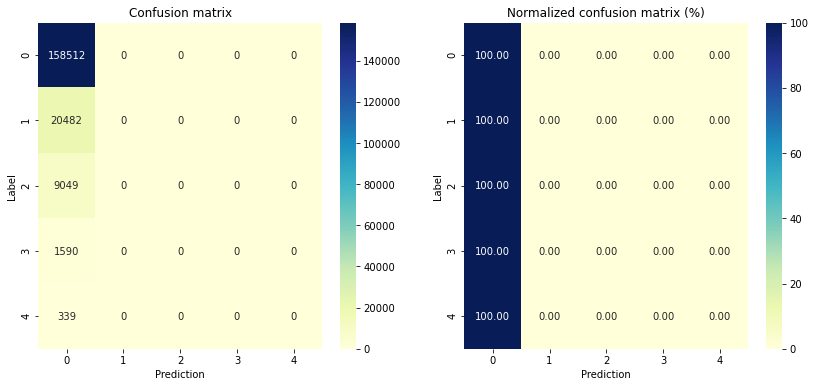

GNB


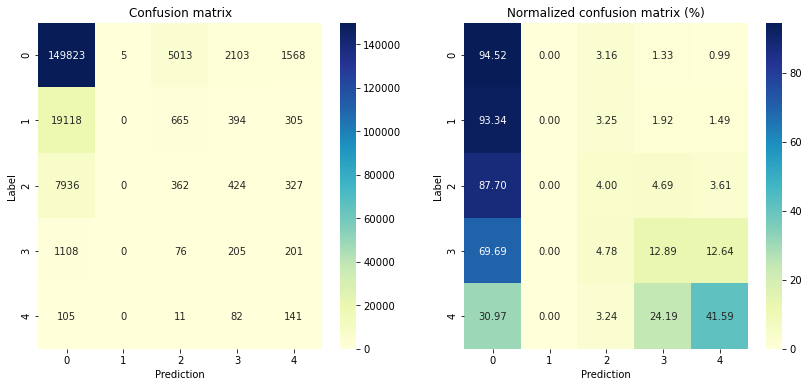

SGD


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


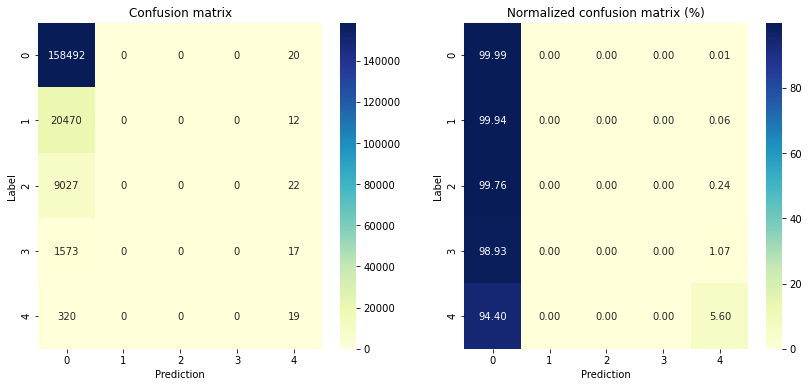

          LR        DT         RF       GNB       SGD
0   0.834381  0.704283   0.834397  0.792385  0.834391
1   0.999905  0.816872   1.000000  0.945184  0.999874
2   0.000000  0.160385   0.000000  0.000000  0.000000
3   0.000000  0.097911   0.000000  0.040004  0.000000
4   0.005031  0.056604   0.000000  0.128931  0.000000
5   0.011799  0.144543   0.000000  0.415929  0.056047
6   0.009010  0.160029   0.003981  0.072678  0.008906
7  29.920415  8.795040  41.282181  0.674001  4.263832
Wall time: 1min 30s


In [31]:
%%time
LR = LogisticRegression(solver = 'lbfgs')
DT = DecisionTreeClassifier(random_state=0)
RF = RandomForestClassifier(max_depth=2, random_state=0)
GNB = GaussianNB()
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

clfs = [LR,DT,RF,GNB,SGD]
clf_names = ['LR','DT','RF','GNB','SGD']
rsts = pd.DataFrame()
for model, name in zip(clfs,clf_names):
  start = time.time()
  print(name)
  model.fit(X_train, y_train)
  # use the model to make predictions with the test data
  y_pred = model.predict(X_test)
  end= time.time()
  # get the evaluation metrics
  result = get_accs(y_test,y_pred,True)
  result.append(end-start)
  rsts[name] = result
print(rsts)

In [32]:
index = ['Global accuracy', 'Class 1','Class 2','Class 3','Class 4','Class 5','G-mean','Training time']
rsts.index = index
rsts

,LR,DT,RF,GNB,SGD
Global accuracy,0.834381,0.704283,0.834397,0.792385,0.834391
Class 1,0.999905,0.816872,1.000000,0.945184,0.999874
Class 2,0.000000,0.160385,0.000000,0.000000,0.000000
Class 3,0.000000,0.097911,0.000000,0.040004,0.000000
Class 4,0.005031,0.056604,0.000000,0.128931,0.000000
Class 5,0.011799,0.144543,0.000000,0.415929,0.056047
G-mean,0.009010,0.160029,0.003981,0.072678,0.008906
Training time,29.920415,8.795040,41.282181,0.674001,4.263832


# MLP simple

In [33]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [34]:
MLP = tf.keras.Sequential([
    keras.layers.Dense(5, activation='relu',input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5),
])
MLP.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train on 607907 samples, validate on 151977 samples
Epoch 1/10
607907/607907 [==============================] - 49s 80us/sample - loss: 0.6147 - accuracy: 0.8278 - val_loss: 0.5666 - val_accuracy: 0.8344
Epoch 2/10
607907/607907 [==============================] - 48s 79us/sample - loss: 0.5728 - accuracy: 0.8343 - val_loss: 0.5670 - val_accuracy: 0.8344
Epoch 3/10
607907/607907 [==============================] - 47s 78us/sample - loss: 0.5724 - accuracy: 0.8343 - val_loss: 0.5666 - val_accuracy: 0.8344
Epoch 4/10
607907/607907 [==============================] - 48s 79us/sample - loss: 0.5725 - accuracy: 0.8343 - val_loss: 0.5672 - val_accuracy: 0.8344
Epoch 5/10
607907/607907 [==============================] - 46s 76us/sample - loss: 0.5726 - accuracy: 0.8343 - val_loss: 0.5673 - val_accuracy: 0.8344
Epoch 6/10
607907/607907 [==============================] - 47s 78us/sample - loss: 0.5724 - accuracy: 0.8343 - val_loss: 0.5665 - val_accuracy: 0.8344
Epoch 7/10
607907/607907 [==========

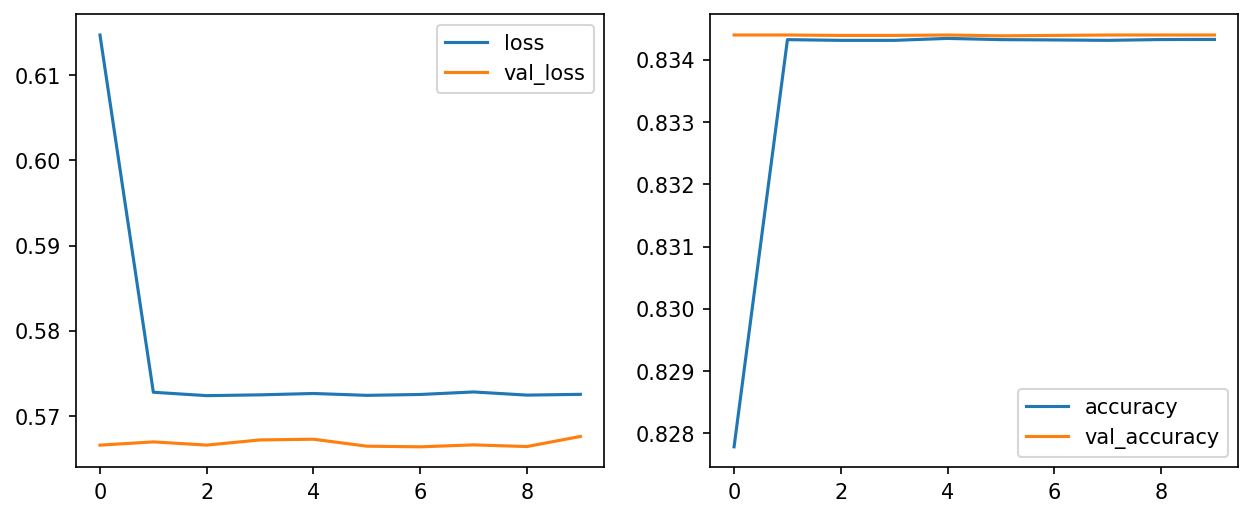

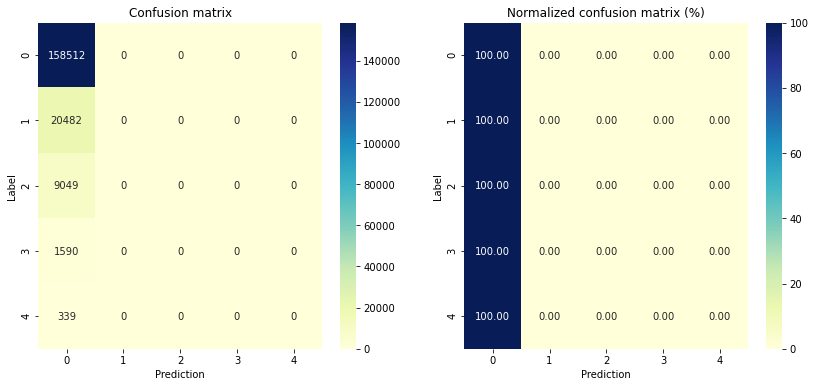

,LR,DT,RF,GNB,SGD,MLP
Global accuracy,0.834381,0.704283,0.834397,0.792385,0.834391,0.834397
Class 1,0.999905,0.816872,1.000000,0.945184,0.999874,1.000000
Class 2,0.000000,0.160385,0.000000,0.000000,0.000000,0.000000
Class 3,0.000000,0.097911,0.000000,0.040004,0.000000,0.000000
Class 4,0.005031,0.056604,0.000000,0.128931,0.000000,0.000000
Class 5,0.011799,0.144543,0.000000,0.415929,0.056047,0.000000
G-mean,0.009010,0.160029,0.003981,0.072678,0.008906,0.003981
Training time,29.920415,8.795040,41.282181,0.674001,4.263832,482.714584


In [35]:
start = time.time()
Monitor_MLP = MLP.fit(X_train, y_train, callbacks=[es],validation_data = (X_val,y_val), verbose = 1, epochs=10)
# use the model to make predictions with the test data
y_pred = MLP.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
end= time.time()

# Show evolution of the training process
hist = pd.DataFrame(Monitor_MLP.history)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4),dpi=150)
hist[['loss','val_loss']].plot(ax=axes[0])
hist[['accuracy','val_accuracy']].plot(ax=axes[1])
plt.show()
# get the evaluation metrics
result = get_accs(y_test,y_pred,True)
result.append(end-start)

rsts['MLP'] = result
rsts

# Variables


In [36]:
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
DT                       DecisionTreeClassifier    DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GNB                      GaussianNB                GaussianNB()
GaussianNB               ABCMeta                   <class 'sklearn.naive_bayes.GaussianNB'>
LR                       LogisticRegression        LogisticRegression()
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MLP                      Sequential                <tensorflow.python.keras.<...>ct at 0x00000225D08B2548>
Monitor_MLP              History                   <tensorflow.python.keras.<...>ct at 0x00000225D4DA5C48>
RF                       RandomForestClassifier    RandomForestClassifier(ma<...>_depth=2, random_state=0)
RandomForestClassifier   